In [11]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt

uploaded = files.upload()
df = pd.read_csv(next(iter(uploaded)))

Saving database_original.csv to database_original (2).csv


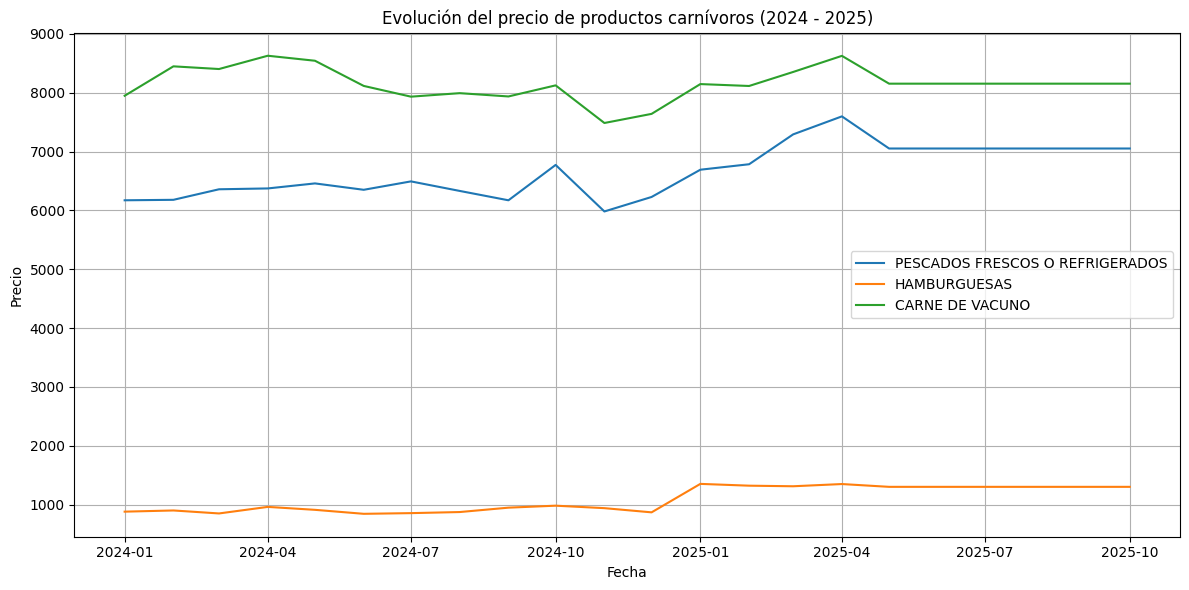

In [31]:
month_year_cols = [col for col in df.columns if '-' in col and col != 'PRODUCTOS']

df_agg = df.groupby('PRODUCTOS')[month_year_cols].mean().reset_index()

df_t = df_agg[['PRODUCTOS'] + month_year_cols].set_index('PRODUCTOS').T

spanish_to_english_months = {
    'ene': 'Jan', 'feb': 'Feb', 'mar': 'Mar', 'abr': 'Apr', 'may': 'May', 'jun': 'Jun',
    'jul': 'Jul', 'ago': 'Aug', 'sep': 'Sep', 'oct': 'Oct', 'nov': 'Nov', 'dic': 'Dec',
    'sept': 'Sep'
}

df_t.index = df_t.index.map(lambda x: '-'.join([spanish_to_english_months.get(x.split('-')[0].lower(), x.split('-')[0]), x.split('-')[1]]))

df_t.index = pd.to_datetime(df_t.index, format="%b-%y")

df_t = df_t.sort_index()

fig = plt.figure(figsize=(12,6)) # Assign the figure to 'fig'

products_to_plot = ["PESCADOS FRESCOS O REFRIGERADOS", "HAMBURGUESAS", "CARNE DE VACUNO"]
found_products = []

for product in products_to_plot:
    if product in df_t.columns:
        plt.plot(df_t.index, df_t[product], label=product)
        found_products.append(product)
else:
    plt.xlabel("Fecha")
    plt.ylabel("Precio")
    plt.title("Evolución del precio de productos carnívoros (2024 - 2025)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    # plt.show() # Removed plt.show() to keep the figure active for saving


In [32]:
fig.savefig("grafico_comparativo_precios.png")

In [33]:
!pip install mpld3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.1/203.1 kB 5.1 MB/s eta 0:00:00


In [34]:
import mpld3

mpld3.save_html(fig, "grafico_comparativo_precios.html")
print("Plot saved as grafico_comparativo_precios.html")

Plot saved as grafico_comparativo_precios.html
